# Mazewright Demo

This notebook lets you interactively generate and visualize mazes using different algorithms.

In [2]:
import matplotlib.pyplot as plt
from mazewright import generate
from mazewright.visualize import render, save, save_svg, save_ascii
from mazewright.solver import solve_bfs

# Configure matplotlib for better display
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

## Generate Basic Mazes

Try different algorithms and sizes:

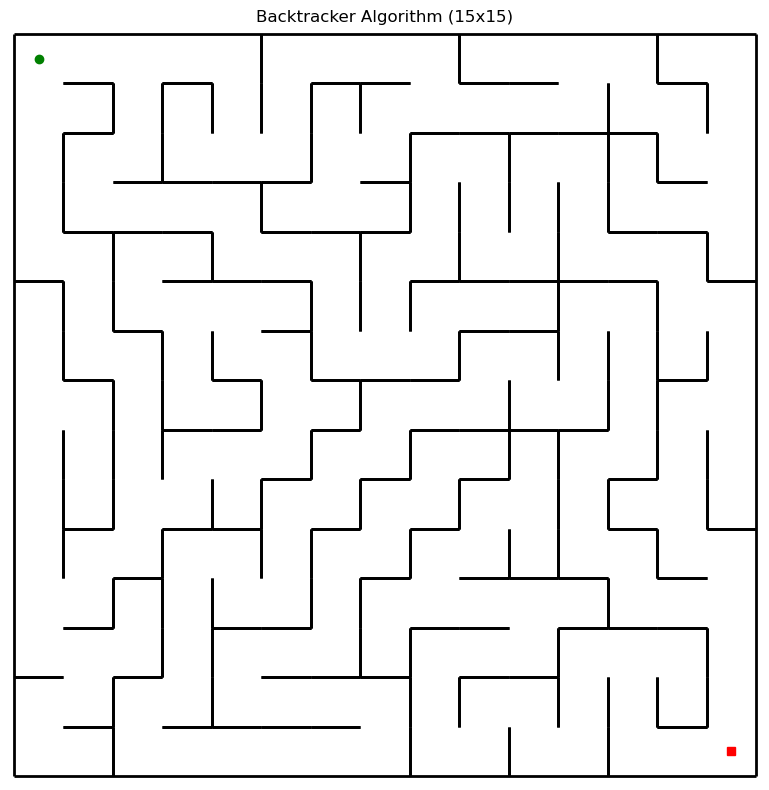

In [3]:
# Generate a maze
rows, cols = 15, 15
algorithm = "backtracker"  # Try: "backtracker", "prim", "kruskal"

maze = generate(rows, cols, algorithm=algorithm)
fig = render(maze, cell_size=0.5, wall_width=2)
plt.title(f"{algorithm.title()} Algorithm ({rows}x{cols})")
plt.show()

## Compare Different Algorithms

Generate mazes side by side:

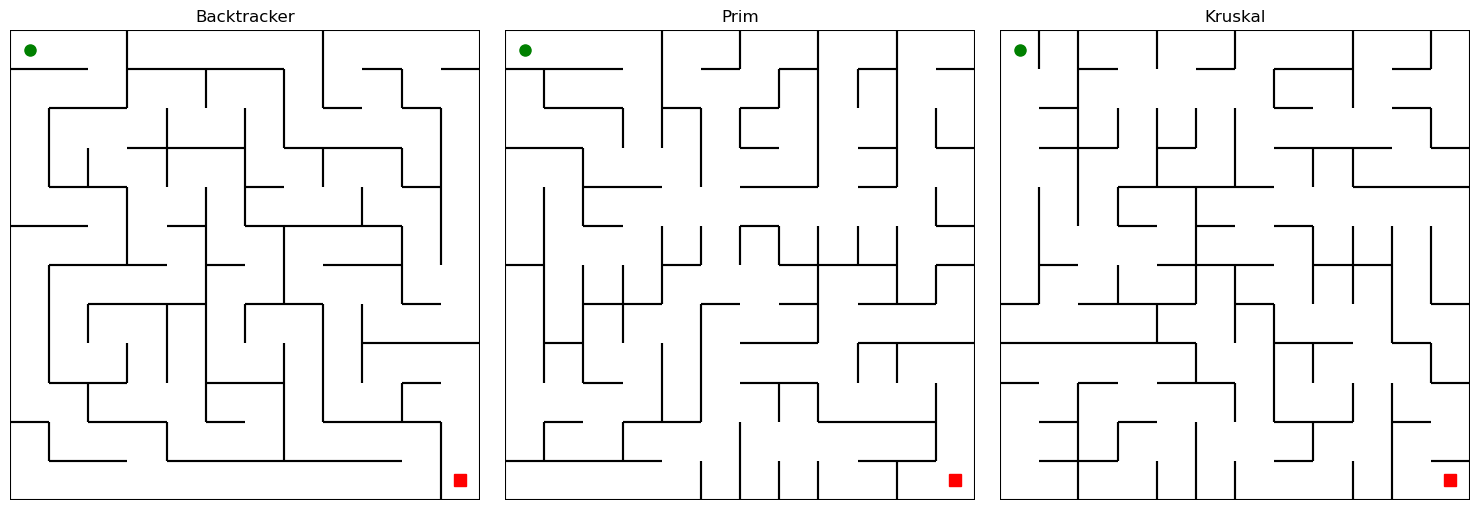

In [4]:
algorithms = ["backtracker", "prim", "kruskal"]
size = 12

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, algo in enumerate(algorithms):
    maze = generate(size, size, algorithm=algo)
    
    # Render maze components manually for subplot
    ax = axes[i]
    
    # Get wall segments (simplified from render function)
    from matplotlib.collections import LineCollection
    from mazewright.maze import Wall
    
    segments = []
    cell_size = 1.0
    
    # Add outer border walls
    segments.append([(0, size * cell_size), (size * cell_size, size * cell_size)])
    segments.append([(0, 0), (size * cell_size, 0)])
    segments.append([(0, 0), (0, size * cell_size)])
    segments.append([(size * cell_size, 0), (size * cell_size, size * cell_size)])
    
    for row in range(maze.rows):
        for col in range(maze.cols):
            cell = maze[row, col]
            x_left = col * cell_size
            x_right = (col + 1) * cell_size
            y_top = (maze.rows - row) * cell_size
            y_bottom = (maze.rows - row - 1) * cell_size
            
            if row > 0 and cell.has_wall(Wall.NORTH):
                segments.append([(x_left, y_top), (x_right, y_top)])
            if row < maze.rows - 1 and cell.has_wall(Wall.SOUTH):
                segments.append([(x_left, y_bottom), (x_right, y_bottom)])
            if col > 0 and cell.has_wall(Wall.WEST):
                segments.append([(x_left, y_bottom), (x_left, y_top)])
            if col < maze.cols - 1 and cell.has_wall(Wall.EAST):
                segments.append([(x_right, y_bottom), (x_right, y_top)])
    
    # Draw walls
    lc = LineCollection(segments, linewidths=1.5, colors='black')
    ax.add_collection(lc)
    
    # Add start and finish markers
    ax.plot(0.5, size - 0.5, 'o', color='green', markersize=8)
    ax.plot(size - 0.5, 0.5, 's', color='red', markersize=8)
    
    # Set properties
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(algo.title())

plt.tight_layout()
plt.show()

## Solve Mazes

Generate a maze and show its solution:

Solution found! Path length: 49 steps


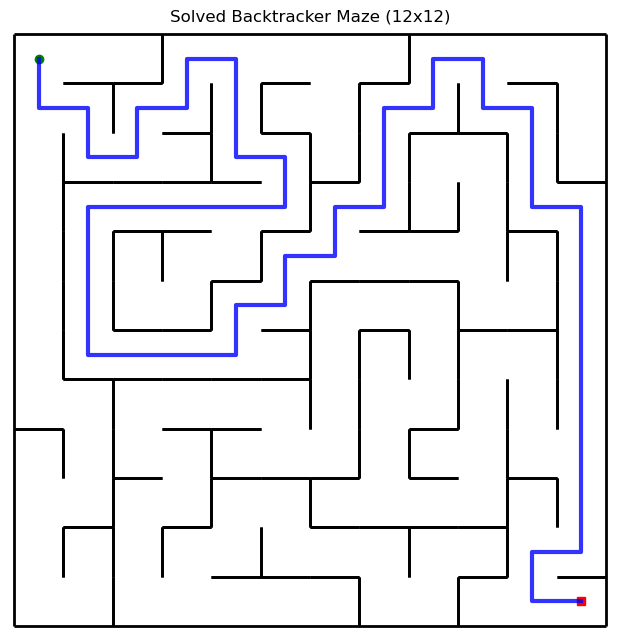

In [5]:
# Generate and solve a maze
rows, cols = 12, 12
algorithm = "backtracker"

maze = generate(rows, cols, algorithm=algorithm)
solution = solve_bfs(maze)

if solution:
    print(f"Solution found! Path length: {len(solution)} steps")
    fig = render(maze, cell_size=0.5, wall_width=2, solution_path=solution)
    plt.title(f"Solved {algorithm.title()} Maze ({rows}x{cols})")
    plt.show()
else:
    print("No solution found!")

## Interactive Maze Generation

Modify the parameters below and run to experiment:

Solution path has 28 steps


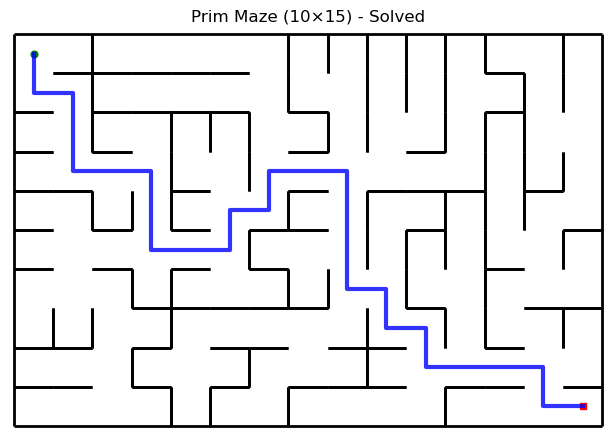

In [6]:
# Experiment with different parameters
ROWS = 10           # Try values from 5 to 25
COLS = 15           # Try values from 5 to 25  
ALGORITHM = "prim"  # Try: "backtracker", "prim", "kruskal"
SHOW_SOLUTION = True  # Set to False to hide solution
WALL_WIDTH = 2      # Try values from 1 to 4
CELL_SIZE = 0.4     # Try values from 0.2 to 1.0

# Generate maze
maze = generate(ROWS, COLS, algorithm=ALGORITHM)

# Solve if requested
solution_path = None
if SHOW_SOLUTION:
    solution_path = solve_bfs(maze)
    if solution_path:
        print(f"Solution path has {len(solution_path)} steps")
    else:
        print("No solution found!")

# Render
fig = render(
    maze, 
    cell_size=CELL_SIZE, 
    wall_width=WALL_WIDTH,
    solution_path=solution_path
)

title = f"{ALGORITHM.title()} Maze ({ROWS}×{COLS})"
if SHOW_SOLUTION and solution_path:
    title += " - Solved"
plt.title(title)
plt.show()

## Maze Statistics

Analyze maze properties:

Maze Analysis:
- Size: 15×15 (225 cells)
- Total possible internal walls: 420
- Walls removed: 224 (53.3%)
- Walls remaining: 196
- Solution path length: 83 steps
- Path efficiency: 296.4% (vs shortest possible: 28)


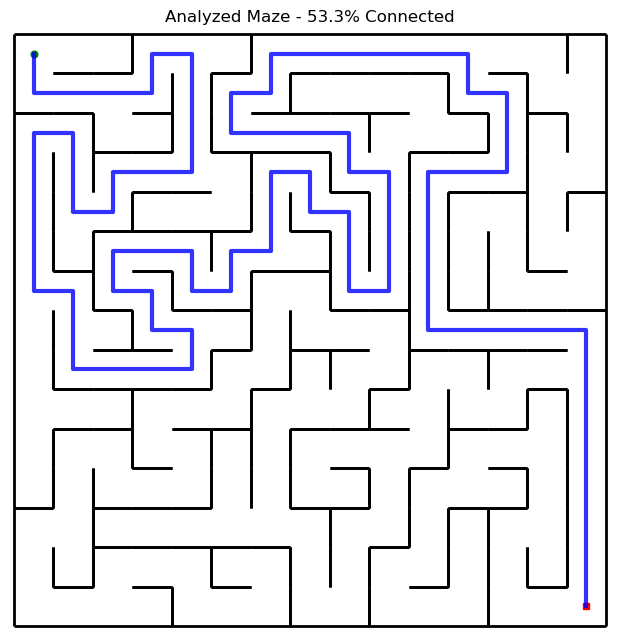

In [7]:
# Generate maze and analyze it
maze = generate(15, 15, algorithm="backtracker")
solution = solve_bfs(maze)

# Count walls
total_possible_walls = 0
remaining_walls = 0

for row in range(maze.rows):
    for col in range(maze.cols):
        cell = maze[row, col]
        
        # Count internal walls only (avoid double counting)
        if row < maze.rows - 1:  # South wall
            total_possible_walls += 1
            if cell.has_wall(Wall.SOUTH):
                remaining_walls += 1
                
        if col < maze.cols - 1:  # East wall  
            total_possible_walls += 1
            if cell.has_wall(Wall.EAST):
                remaining_walls += 1

walls_removed = total_possible_walls - remaining_walls
connectivity = walls_removed / total_possible_walls * 100

print(f"Maze Analysis:")
print(f"- Size: {maze.rows}×{maze.cols} ({maze.rows * maze.cols} cells)")
print(f"- Total possible internal walls: {total_possible_walls}")
print(f"- Walls removed: {walls_removed} ({connectivity:.1f}%)")
print(f"- Walls remaining: {remaining_walls}")

if solution:
    print(f"- Solution path length: {len(solution)} steps")
    efficiency = len(solution) / (maze.rows + maze.cols - 2) * 100
    print(f"- Path efficiency: {efficiency:.1f}% (vs shortest possible: {maze.rows + maze.cols - 2})")
else:
    print("- No solution found!")

# Show the maze
fig = render(maze, cell_size=0.4, solution_path=solution)
plt.title(f"Analyzed Maze - {connectivity:.1f}% Connected")
plt.show()

## ASCII Maze Export

Generate and display mazes in ASCII format:

In [8]:
# Generate a maze and display it in ASCII format
rows, cols = 10, 20
algorithm = "kruskal"

maze = generate(rows, cols, algorithm=algorithm)

# Get ASCII representation
ascii_maze = save_ascii(maze)

print(f"ASCII Maze ({rows}×{cols}) - {algorithm.title()} Algorithm:")
print()
print(ascii_maze)

# Also solve it and show the solution in ASCII
solution = solve_bfs(maze)
if solution:
    ascii_with_solution = save_ascii(maze, solution_path=solution)
    print("\nSame maze with solution path (marked with *):")
    print()
    print(ascii_with_solution)

ASCII Maze (10×20) - Kruskal Algorithm:

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| S     |                       |       |   |                   |           |   |
+   +   +   +---+   +   +   +---+---+   +   +   +   +   +---+   +   +   +   +   +
|   |   |   |       |   |   |                   |   |   |   |       |   |       |
+   +---+---+   +---+---+---+---+   +---+---+   +---+---+   +---+   +---+---+   +
|               |           |               |       |   |   |       |   |       |
+   +   +   +---+---+   +---+---+   +   +---+   +---+   +   +---+---+   +   +---+
|   |   |   |   |   |           |   |   |                       |               |
+---+   +   +   +   +---+---+   +   +---+   +---+---+---+   +---+   +---+---+   +
|       |               |           |               |   |       |   |           |
+   +---+---+---+   +---+---+---+---+   +---+   +---+   +   +   +---+   +   +---+
|   |   |               |                   |       |   |